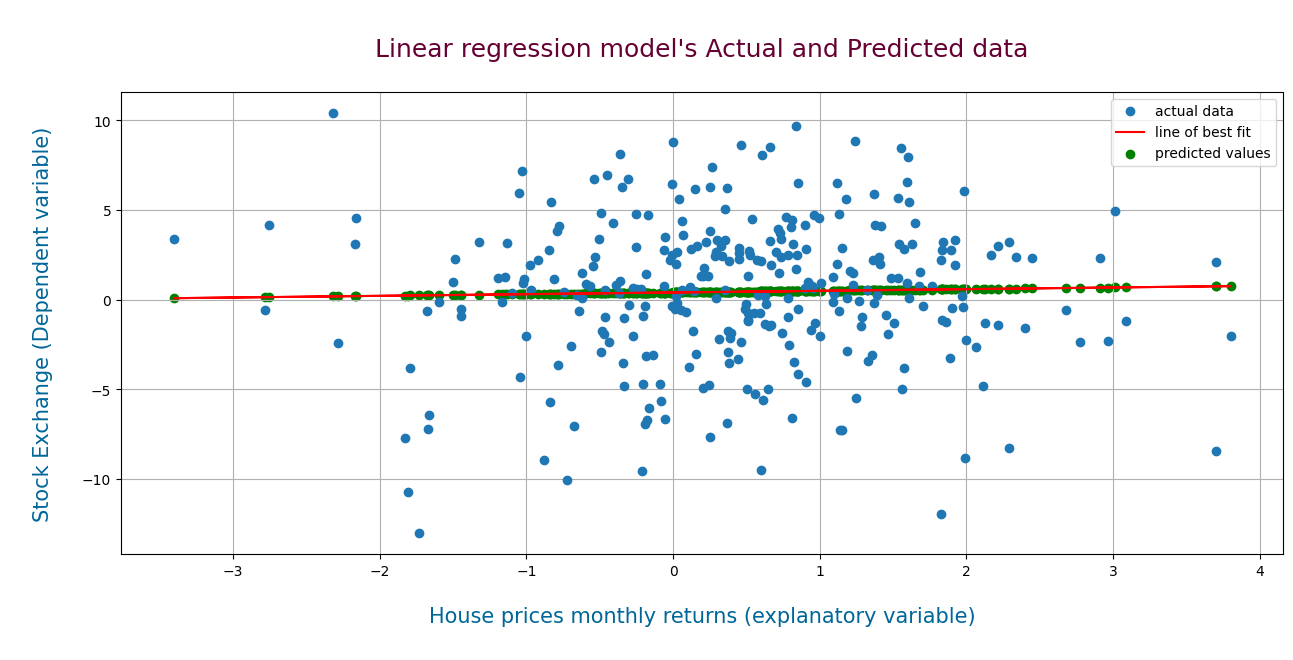

Slope (Beta): 0.09324142754349976
Intercept (Constant): 0.4047837686662456
Correlation Coefficient (R): 0.02655129570190993
P-Value: 0.640904900003165
Failure to reject the null hypothesis: There is no significant relationship between house returns and FTSE100 returns.


In [1]:
# DIAML_Assignment4 Question 1
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as stm

#Read the stock exchange dataset
FTS = pd.read_csv('FTSE100.csv', parse_dates=True, index_col="Date")
#sort reorder the data to an ascending chronological order
FTS = FTS.sort_index(ascending=True)
#Filter the dataframe to remove unwanted dates
FTS_91_16 = FTS[(FTS.index.year >=1991) & (FTS.index.year < 2017)]
#Calculate the monthly retuns of the stock exchange dataset
SE_ret = FTS['Adj Close'].pct_change()*100
SE_ret = SE_ret[1:]

#Read the monthly returns dataset
House_price = pd.read_excel("Monthly.xls", parse_dates=True, index_col="Unnamed: 0")
#Filter the dataframe to remove unwanted dates
House_price_91_16 = House_price[(House_price.index.year >=1991) & (House_price.index.year < 2017)]
#Calculate the monthly returns of the house prices dataset
RT_ret = House_price_91_16['Average House Price'].pct_change()*100
RT_ret = RT_ret[1:]

#Create the linear regression model
result = stats.linregress(RT_ret, SE_ret)

#Fitting the linear regression model
x_ = stm.add_constant(RT_ret)
x_ = x_.reset_index(drop=True)
SE_ret = SE_ret.reset_index(drop=True)
lg_model = stm.OLS(SE_ret, x_).fit()

#Make predictions and assign the prediction values to an object
pred_values = lg_model.predict()

#Set the height and width of the graph 
plt.figure(figsize=(15, 6))

#Set the title and labels and style their font size, font and color
titleFont = {'color':'#660033','size':18, 'family':'sans-serif'}
labelsFont = {'color':'#006699','size':15, 'family':'sans-serif'}
plt.grid()
plt.title("\nLinear regression model's Actual and Predicted data\n", fontdict = titleFont)
plt.xlabel("\nHouse prices monthly returns (explanatory variable)\n", fontdict = labelsFont) 
plt.ylabel("\nStock Exchange (Dependent variable)\n", fontdict = labelsFont)

#Plot the given data values of Stock exchange and House prices
plt.plot(RT_ret, SE_ret, 'o', label='actual data')
#Plot the line of best fit
plt.plot(RT_ret, result.intercept + result.slope*RT_ret, 'r', label='line of best fit')
#Plot the predicted values
plt.scatter(RT_ret, pred_values, color='green', label='predicted values')
plt.legend()
plt.show()

# Statistics of the model
print("Slope (Beta):", result.slope)
print("Intercept (Constant):", result.intercept)
print("Correlation Coefficient (R):", result.rvalue)
print("P-Value:", result.pvalue)

# Hypothesis testing
alpha = 0.05  # Significance level

if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant relationship between house returns and FTSE100 returns.")
else:
    print("Failure to reject the null hypothesis: There is no significant relationship between house returns and FTSE100 returns.")

DIAML_Assignment4 Question 2

The best predictor variables using stepwise ['Outstate', 'Top25perc']
0.3777644174986873
Best predictor variables to select the model using BIC: ['Outstate', 'Top25perc']
R-squared (BIC Model): 0.4834179169125846
R-squared (Stepwise Model): 0.4834179169125846
R-squared (For all predictors): 0.4528562161254003
Mean Squared Error (BIC): 121.50146022950811
Mean Squared Error (Stepwise): 121.50146022950811
Mean Squared Error (For all predictors): 128.68965237614097
The graduation rate at CMU would be: [86.83968987]


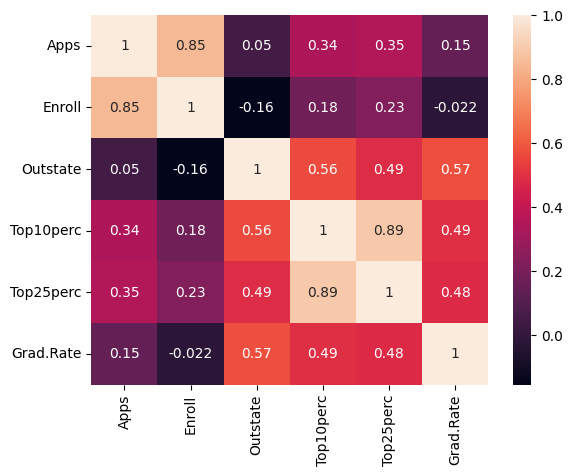

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from stepwise_regression.step_reg import *

#Read the college dataset
report = pd.read_csv('College.csv')
#Extract the useful variables
variables = report[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc', 'Grad.Rate']]

#Calculate the coefficients matrix
corrCoef = variables.corr()
#Graph the statistical results 
sns.heatmap(corrCoef,annot=True)

#Assign all columns and rows of the predictor variables to X
X = variables.iloc[:, :-1]

#Assign the column and all rows of the dependent variable to Y
Y = variables.iloc[:, -1]

#Buil a linear regression model
xm = sm.add_constant(X)
model = sm.OLS(Y, xm).fit()

# print(model.summary())
# print(f'BIC of the model: {model.bic}')

#2.D

def stepwise_regression(x, y):
    best_bic = float("inf")
    best_model = None
    num_predictors = x.shape[1]  # Get the number of predictor variables
    
    predictor_indices = list(range(num_predictors))

    # Generate all possible combinations of predictor variables
    for num in range(1, num_predictors + 1):
        for subset in combinations(predictor_indices, num):
            predictors = x.iloc[:, list(subset)]
            predictors = sm.add_constant(predictors)  # Add a constant for the intercept
            model = sm.OLS(y, predictors).fit()

            # Check if BIC is lower than the best BIC
            if model.bic < best_bic:
                best_bic = model.bic
                best_model = model

    return best_model

best_variables = forward_regression(X, Y, 0.05, verbose=False)

#Selected Predictor variables
print(f'The best predictor variables using stepwise', best_variables)

# Perform stepwise regression
best_model = stepwise_regression(X, Y)

# Access the best predictor variables from the best model
# print("==========")
# print(best_model.rsquared)

best_predictors = best_model.model.exog_names
best_predictors = [nm for nm in best_predictors if nm != 'const']

# Print the best predictor variables
print("Best predictor variables to select the model using BIC:", best_predictors)

X_bic = X[['Outstate', 'Top25perc']]
X_stepwise = X[['Outstate', 'Top25perc']]
y = variables.iloc[:, -1]
X_5 = X[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]

# Split the data into training and testing sets
X_bic_train, X_bic_test, y_train_bic, y_test_bic = train_test_split(X_bic, y, test_size=0.2, random_state=42)
X_stepwise_train, X_stepwise_test, y_train_sw, y_test_sw = train_test_split(X_stepwise, y, test_size=0.2, random_state=42)

X_5_train, X_5_test, y_train_X_5, y_test_X_5 = train_test_split(X_5, y, test_size=0.2, random_state=42)

# Create and train the linear regression models
bic_model = LinearRegression()
stepwise_model = LinearRegression()
X_5_model = LinearRegression()

bic_model.fit(X_bic_train, y_train_bic)
stepwise_model.fit(X_stepwise_train, y_train_sw)
X_5_model.fit(X_5_train, y_train_X_5)

# Predict graduation rates
y_bic_pred = bic_model.predict(X_bic_test)
y_stepwise_pred = stepwise_model.predict(X_stepwise_test)
yX_5_pred = X_5_model.predict(X_5_test)

# Calculate Mean Squared Error for both models
mse_bic = mean_squared_error(y_test_bic, y_bic_pred)
mse_stepwise = mean_squared_error(y_test_sw, y_stepwise_pred)
mse_x5 = mean_squared_error(y_test_X_5, yX_5_pred)

# Calculate R-squared for the BIC model
r2_bic = r2_score(y_test_bic, y_bic_pred)


# Calculate R-squared for the Stepwise model
r2_stepwise = r2_score(y_test_sw, y_stepwise_pred)

r2_x5 = r2_score(y_test_X_5, yX_5_pred)

"""This code calculates and compares the R-squared values for both the BIC 
and Stepwise models. R-squared values range from 0 to 1, with higher values
 indicating better model fit.
"""

print(f'R-squared (BIC Model): {r2_bic}')
print(f'R-squared (Stepwise Model): {r2_stepwise}')
print(f'R-squared (For all predictors): {r2_x5}')

"""
This code calculates the MSE for both models on the testing data, which will 
give you a measure of how well they predict graduation rates. Lower MSE ,
indicates a better model. 
"""
print(f'Mean Squared Error (BIC): {mse_bic}')
print(f'Mean Squared Error (Stepwise): {mse_stepwise}')
print(f'Mean Squared Error (For all predictors): {mse_x5}')

#2. E

#2. F
data = pd.DataFrame({'Outstate': [17900], 'Top25perc': [89]})
gradRate = bic_model.predict(data)
print(f'The graduation rate at CMU would be: {gradRate}')


DIAML_Assignment4 Question 3

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

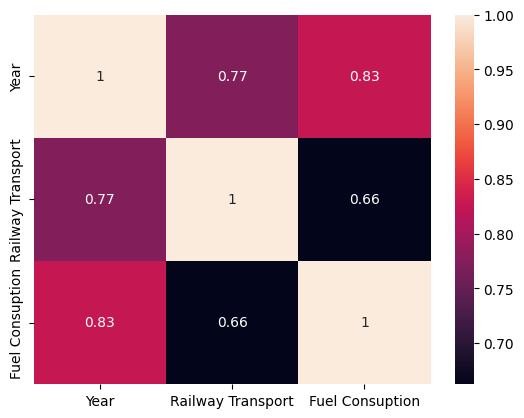

In [5]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

goods = pd.read_csv("API_IS.RRS.GOOD.MT.K6_DS2_en_csv_v2_5873687.csv", skiprows=4)
fuel = pd.read_csv("API_EG.USE.COMM.FO.ZS_DS2_en_csv_v2_5872795.csv", skiprows=4)

Turkiye_fuel = fuel[fuel['Country Name'] == 'Turkiye']
TKGoods = goods[goods['Country Name'] == 'Turkiye']

#Extract the transportation dataset
TKGoods = TKGoods.loc[:, str(1995):str(2015)]
TKGoods = TKGoods.T 
TKGoods.reset_index(inplace=True)
TKGoods.columns = ['Year', 'Railway Transport']
# print(TKGoods)

# Extract the fuel dataset
Turkiye_fuel = Turkiye_fuel.loc[:, str(1995):str(2015)]
Turkiye_fuel = Turkiye_fuel.T 
Turkiye_fuel.reset_index(inplace=True)
Turkiye_fuel.columns = ['Year', 'Fuel Consuption']

#Merge the dataframe
fuel_data = pd.merge(TKGoods, Turkiye_fuel, on = "Year", how="outer")
fuel_data["Year"] = pd.to_datetime(fuel_data["Year"]).dt.year
# print(fuel_data)
corrCoef = fuel_data.corr()

#Print the statistical results with heatmap
sns.heatmap(corrCoef,annot=True)

# if fuel_data.isna().any().any():
#     print("DataFrame contains NaN values")
# else:
#     print("DataFrame does not contain NaN values")

#  Fit and create the linear regression model 
x0 = sm.add_constant(fuel_data[['Railway Transport', 'Year']])
model = sm.OLS(fuel_data['Fuel Consuption'], x0).fit()
# print(model.summary()) 

#Create a instance to predict the situation in 2021
data = pd.DataFrame({'const': [1], 'Railway Transport': [16300], 'Year': [2021]})

#Use the model to predict 
fuel_consumption = model.predict(data)

print(f'The Fuel consumption in 2021 would be: {fuel_consumption.iloc[0]}')

# Calculate Mean Squared Error (MSE)
mse = model.mse_resid

# Get R-squared (R²)
rsquared = model.rsquared

# Print the MSE and R-squared
print(f"Fuel Mean Squared Error (MSE): {mse}")
print(f"Fuel R-squared (R²): {rsquared}")

#What is the difference between forward selection and backward selection



DIAML_Assignment4 Question 4

In [4]:
import quandl
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#Read the API_Key file containing the my API key
quandl.read_key("./mkennyro_API_Key.txt")

#Retrive the unemployment dataset
unpt_data = quandl.get('ODA/ISR_LUR')

#Filter out the dates that are out of the given scope
unpt_data = unpt_data[(unpt_data.index.year >=1980) & (unpt_data.index.year < 2013)]

#Append a year column of the year values for each date
unpt_data['Year'] = unpt_data.index.year

#Create a linear regression model
model2 = LinearRegression()
X = unpt_data[['Year']]
y = unpt_data['Value']
#Fit the model
model2.fit(X, y)

#Create a dataframe for the year 2020
year = pd.DataFrame([[2020]], columns=['Year'])
#Predict the unemployment rate for the year 2020
pred2020 = model2.predict(year)
print(f'The predicetd Unemployment rate in 2020: {pred2020[0]}')

#predict unemployment rate for all years 1980-2013
Allpredictions = model2.predict(X)
#Create numpy arrays of predicted rates and actual rates
actual_vals, pred_Vals = np.array(y), np.array(Allpredictions)

#Calculate the mape
MAPE = np.mean(np.abs((actual_vals - pred_Vals) / actual_vals)) * 100
print(f'The accuracy of the model determined by MAPE is {MAPE}')

The predicetd Unemployment rate in 2020: 12.078546345811048
The accuracy of the model determined by MAPE is 21.99260154027202
